# Importing Libraries

In [1]:
import numpy as np
import keras
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten,Conv2D

Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\ksham\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


# Loading dataset

In [12]:
#loading dataset
x_train = np.loadtxt(r"C:\Users\ksham\OneDrive\Documents\datasets\input.csv",delimiter=",")
y_train = np.loadtxt(r"C:\Users\ksham\OneDrive\Documents\datasets\labels.csv", delimiter =',')

x_test = np.loadtxt(r"C:\Users\ksham\OneDrive\Documents\datasets\input_test.csv", delimiter =',')
y_test = np.loadtxt(r"C:\Users\ksham\OneDrive\Documents\datasets\labels_test.csv", delimiter =',')

In [13]:
#Shape
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)


In [14]:
#Reshape
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


In [15]:
len(x_train)

2000

# Normalize and display

In [16]:

x_train = x_train/255
x_test = x_test/255

x_train[2,:]

array([[[0.31372549, 0.36078431, 0.34509804],
        [0.3254902 , 0.37647059, 0.34901961],
        [0.29803922, 0.36078431, 0.32156863],
        ...,
        [0.05490196, 0.1372549 , 0.07843137],
        [0.05490196, 0.1372549 , 0.07843137],
        [0.07843137, 0.16078431, 0.10196078]],

       [[0.30588235, 0.34117647, 0.32941176],
        [0.35294118, 0.39607843, 0.37254902],
        [0.30980392, 0.35294118, 0.32156863],
        ...,
        [0.14509804, 0.21176471, 0.14901961],
        [0.12156863, 0.18823529, 0.1254902 ],
        [0.05098039, 0.11764706, 0.05490196]],

       [[0.25098039, 0.25882353, 0.24705882],
        [0.31372549, 0.33333333, 0.30980392],
        [0.36470588, 0.39215686, 0.36078431],
        ...,
        [0.15686275, 0.18039216, 0.1254902 ],
        [0.15686275, 0.18823529, 0.12941176],
        [0.05490196, 0.08627451, 0.02745098]],

       ...,

       [[0.39215686, 0.42745098, 0.36078431],
        [0.36470588, 0.41568627, 0.3372549 ],
        [0.35294118, 0

# Display random image

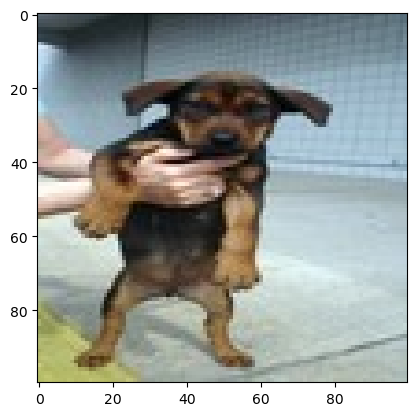

In [17]:

rdx=random.randint(0,len(x_train))
plt.imshow(x_train[rdx,:])
plt.show()

# Model building

In [18]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


C:\Users\ksham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [24]:
H=model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7235 - loss: 0.5889
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.7461 - loss: 0.5213
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.7475 - loss: 0.5125
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.8183 - loss: 0.4201
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8436 - loss: 0.3579


# Evaluation

In [25]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7862 - loss: 0.4561


[0.6755776405334473, 0.6549999713897705]

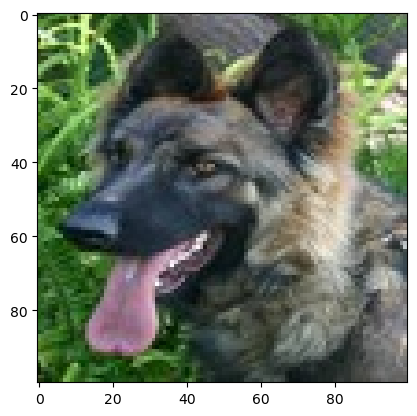

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
It is a dog


In [26]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("It is a",pred)

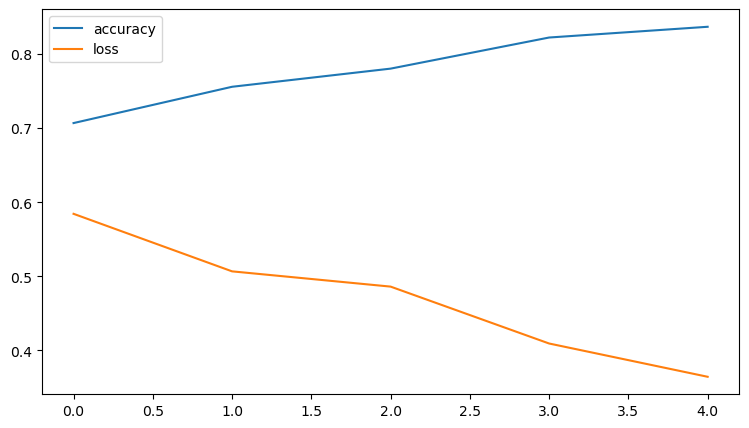

In [27]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()